In [1]:
import pandas as pd

In [1]:
df=pd.read_csv('car data.csv')

NameError: name 'pd' is not defined

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [6]:
## Checking null values if any
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
final_set = df[['Year','Selling_Price' ,'Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [9]:
final_set.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
final_set['No_Of_Years'] = 2020 - final_set['Year']

In [11]:
final_set.drop(['Year'] , axis = 1, inplace = True)

In [12]:
final_set.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
## Since low features < 3 using one hot encoding
final_set = pd.get_dummies(final_set , drop_first=True)

In [14]:
final_set.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [15]:
final_set.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [16]:
#representation of correlation
import seaborn as sns

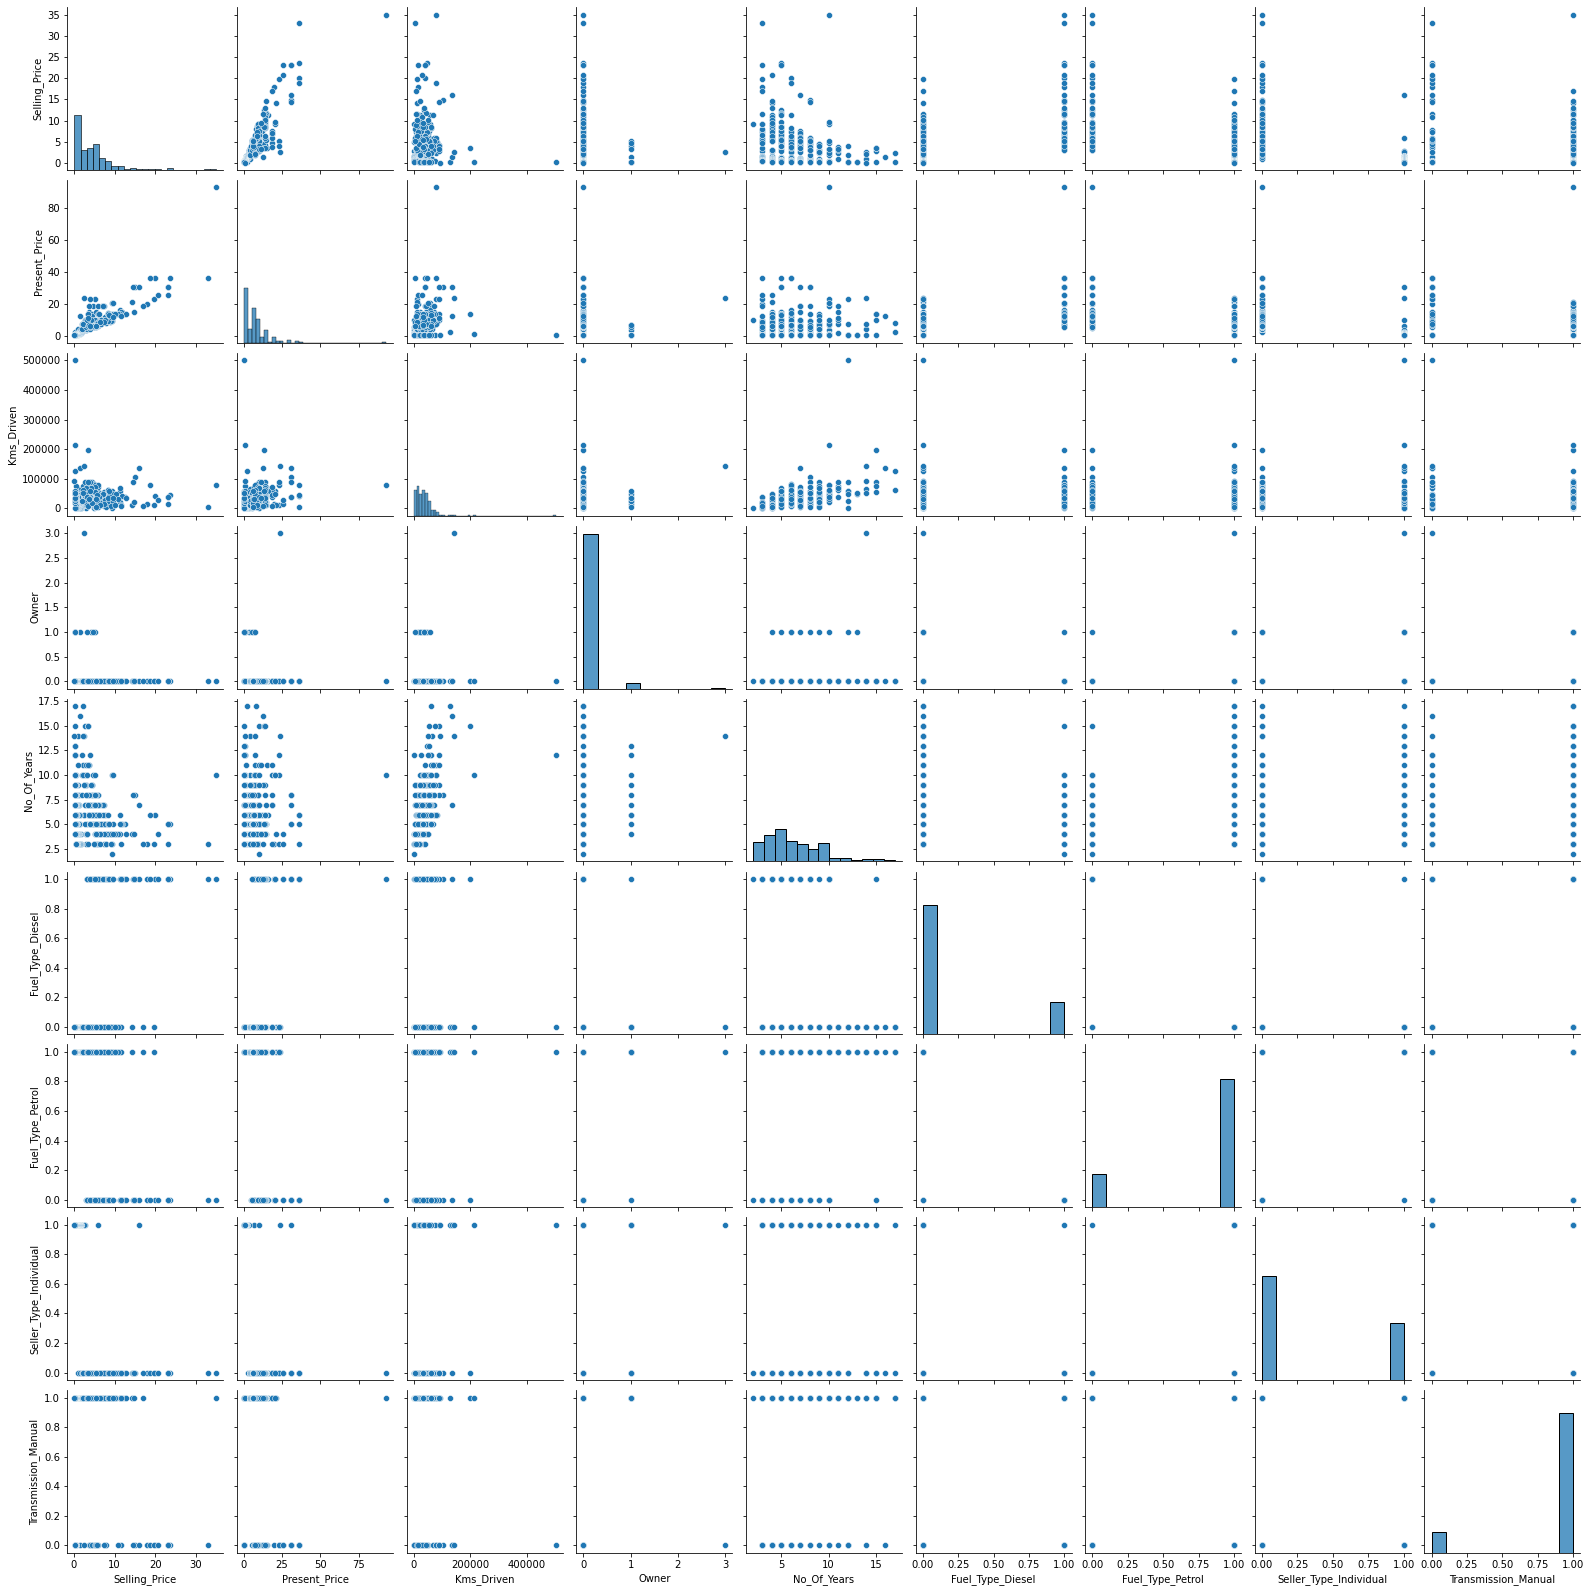

In [17]:
sns.pairplot(final_set)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_Of_Years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')


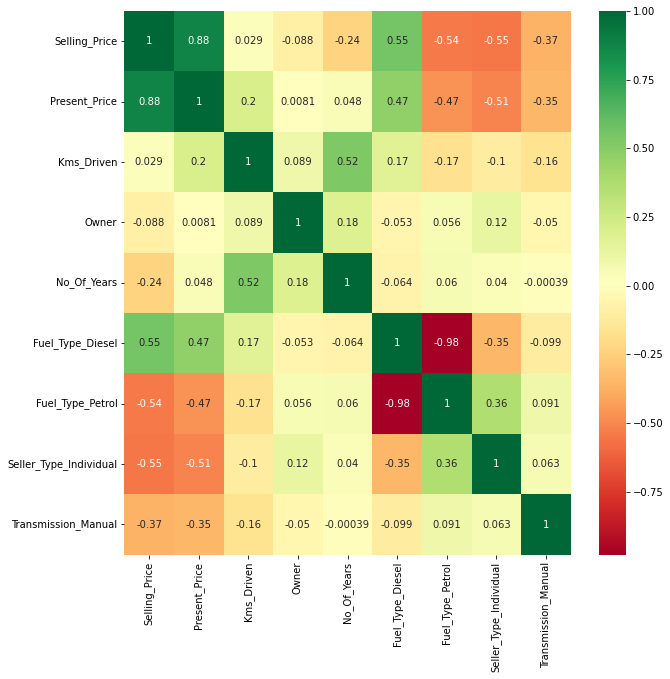

In [19]:
#By graphs data was not clear so using heat maps
corrmat=final_set.corr()
top_corr_feature=corrmat.index
print(corrmat.index)
plt.figure(figsize=(10,10))
#plot heat map
g = sns.heatmap(final_set[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

In [20]:
X=final_set.iloc[:,1:] #independent feature selling price
y=final_set.iloc[:,0] #dependent feature

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
### Ordering of important features
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.40421241 0.03939597 0.00120399 0.07647449 0.22173392 0.01118615
 0.11498156 0.13081153]


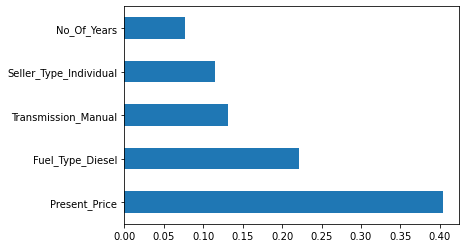

In [25]:
#visual representation of feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind="barh")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
X_train.shape

(210, 8)

In [1]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [2]:
##Hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start = 100 , stop = 1000, num = 10)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 20, num = 6)]

min_samples_split = [2,3,4,5,6]

min_samples_leaf = [3 , 5, 7]

In [32]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 8, 11, 14, 17, 20], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [3, 5, 7]}


In [33]:
rf = RandomForestRegressor()

In [34]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)

In [35]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=700; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=700; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=700; total time=   0.7s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=700; total time=   0.6s
[CV] END max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=700; total time=   0.6s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 8, 11, 14, 17, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 5, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 17}

In [37]:
rf_random.best_score_

-6.353201234017261

In [38]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 8, 11, 14, 17, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 5, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
predictions=rf_random.predict(X_test)

C:\Users\Sourav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

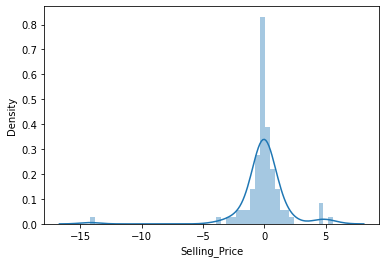

In [40]:
sns.distplot(y_test-predictions)

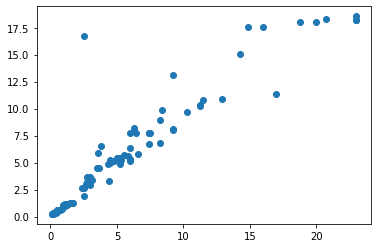

In [41]:
plt.scatter(y_test,predictions)